Проанализировав набор данных, я пришел к выводу о том, что при явно наблюдаемой зависимости уровня счастья от уровня экономической, социальной и пр. составляющих у лидеров рейтинга, наверное все-таки не совсем правильно считать набор высоких показателей гарантом того, что граждане страны счастливы. Хотя конечно как правило если у страны высокие показатели экономики, социальной поддержки, продолжительности жизни и восприятия коррупции, то с большой степенью уверенности мы можем говорить о том, что граждане этой страны счастливы, однако это работает не всегда, предполагаю, что одной из причин причин может быть неравномерность распределения того или иного общего успешного показателя непосредственно внутри страны - как пример, США с их стремительно увеличивающимся разрывом между богатыми и бедными. Собственно, тенденция к разрыву доходов между богатыми и бедными характерна для многих стран, которых можно назвать сверхдержавами - США, Индия, Китай, Россия и т.д. и страны эти не возглавяют рейтинг счастья. Равномерность же распространения внутренних благ как раз характерна для стран расположенных около центра "скандинавского социализма", что мы и видим из рейтинга - лидеры практически из одного региона.
Сразу оговорюсь, что не увидел какой-то выраженной закономерности между положением в рейтинге и показателями  Freedom to make life choices и Generosity и вообще не особо понял как их считали (имхо чистый субъективизм), поэтому в исследование включать их не стал.
Далее непосредственно само исследование:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving 2019.csv to 2019.csv


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

In [10]:
df19 = pd.read_csv('2019.csv')
df19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


**1. Есть предположение, что чем лучше в стране экономическая и социальная обстановка, тем счастливее граждане этих стран.** Проверим, есть ли зависимость между экономикой и социальной поддержкой.

Строим график, исходя из которого мы можем говорить о том, что есть зависимость между экономической ситуацией и уровнем счастья граждан. В общем и целом, чем богаче страна, тем более счастливы ее граждане. Так же видим, что лидеры рейтинга имеют высокие показатели по борьбе с коррупцией...

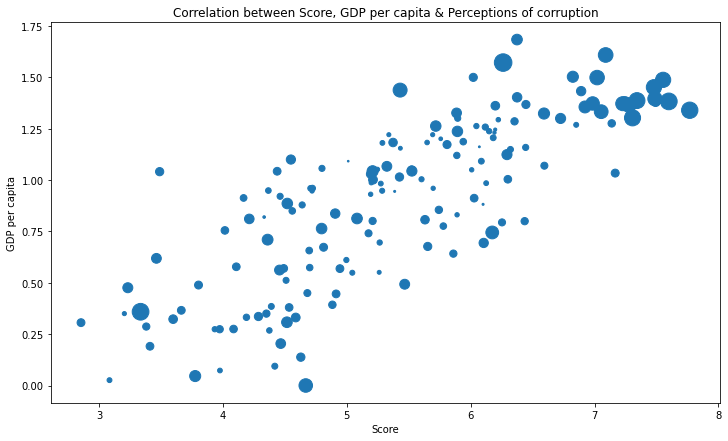

In [16]:
df19.plot(kind='scatter', 
        x='Score', 
        y='GDP per capita', 
        s=df19['Perceptions of corruption']*680, 
        title='Correlation between Score, GDP per capita & Perceptions of corruption')

...и высокие показатели продолжительности жизни.

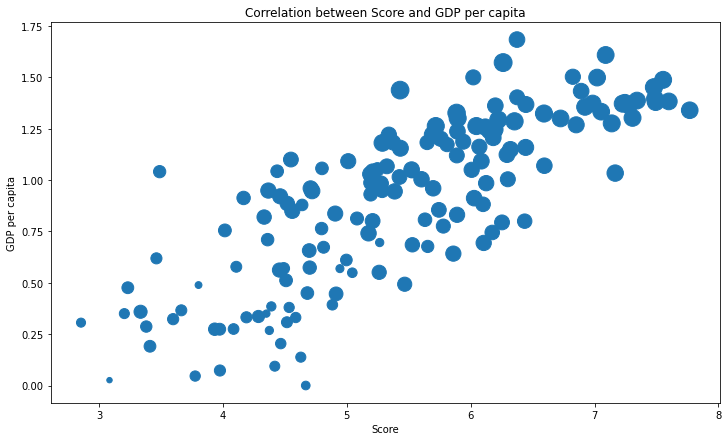

In [8]:
df19.plot(kind='scatter', 
        x='Score', 
        y='GDP per capita', 
        s=df19['Healthy life expectancy']*280, 
        title='Correlation between Score, GDP per capita & Healthy life expectancy')

**2. Аналогично с социальной поддержкой - наблюдаем зависимость между этим параметром и уровнем счастья граждан.**

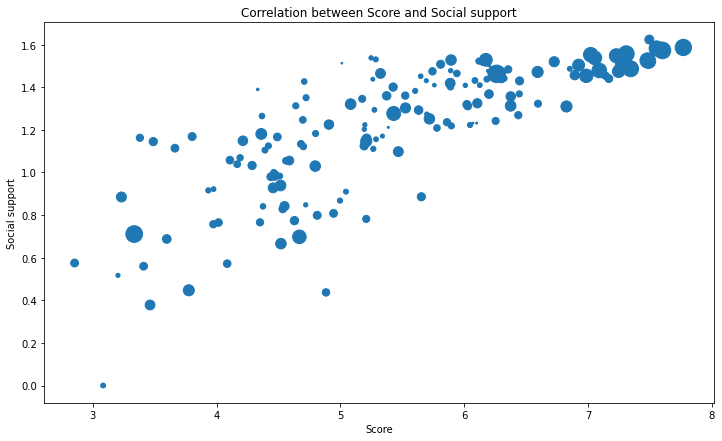

In [89]:
df19.plot(kind='scatter', 
        x='Score', 
        y='Social support',
        s=df19['Perceptions of corruption']*680,  
        title='Correlation between Score and Social support')

**3. Логично предположить, что социальная поддержка и экономический уровень тоже взаимосвязаны, на графике видим эту связь.**

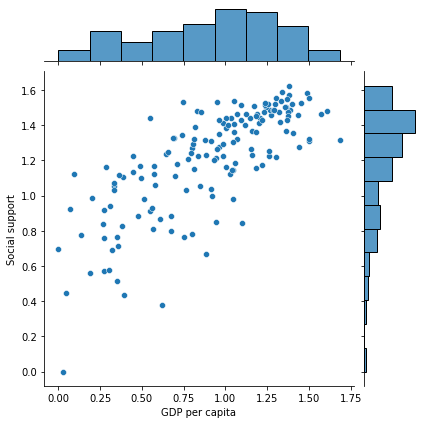

In [11]:
sns.jointplot(x='GDP per capita', y='Social support', 
              data=df19, kind='scatter')


**4. При этом видно, что в правом конце вышеприведенных графиков (в лидирующих значениях) взаимосвязь между показателями выражена сильнее, нежели в показателях стран-аутсайдеров. Посмотрим heatmap, для начала лидеров.
Здесь палитра графика ровная и можно сделать вывод о том, что у всех лидеров рейтинга высокие показатели экономической ситуации и социальной поддержки.**

In [13]:
df_one = df19.groupby('Country or region').sum().sort_values('Score')
df_two = df_one[['GDP per capita', 'Social support', 'Perceptions of corruption', 'Healthy life expectancy', 'Generosity', 'Freedom to make life choices']]
df_two

,GDP per capita,Social support,Perceptions of corruption,Healthy life expectancy,Generosity,Freedom to make life choices
Country or region,,,,,,
South Sudan,0.306,0.575,0.091,0.295,0.202,0.010
Central African Republic,0.026,0.000,0.035,0.105,0.235,0.225
Afghanistan,0.350,0.517,0.025,0.361,0.158,0.000
Tanzania,0.476,0.885,0.147,0.499,0.276,0.417
Rwanda,0.359,0.711,0.411,0.614,0.217,0.555
...,...,...,...,...,...,...
Netherlands,1.396,1.522,0.298,0.999,0.322,0.557
Iceland,1.380,1.624,0.118,1.026,0.354,0.591
Norway,1.488,1.582,0.341,1.028,0.271,0.603


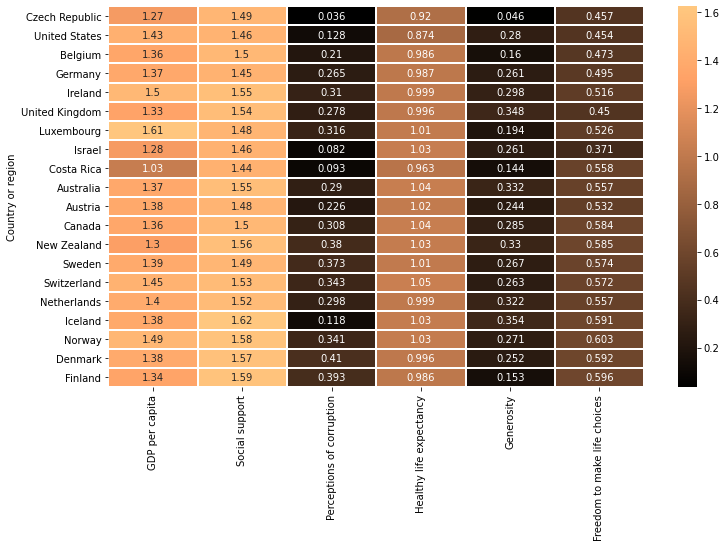

In [15]:
sns.heatmap(df_two.tail(20), annot = True, fmt='.3g', cmap= 'copper', linewidths=1)

**У аутсайдров картинка более пестрая, видим, что среди стран с очень низкими показателями по всем параметрам, есть страны с довольно высокими показателями экономики и социальной поддержки, например такие как Ботсвана или Египт, и при этом находящиеся все равно в конце рейтинга счастья. Проследить какую-то четкую взаимосвязь между уровнем счастья граждан и экономическими и социальными показателями у стран аутсайдеров гораздо сложнее, чем у лидеров рейтинга.**

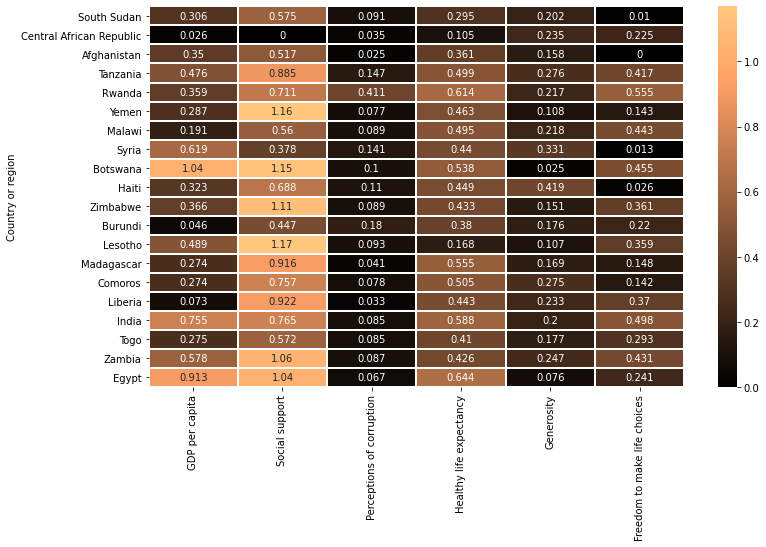

In [68]:
sns.heatmap(df_two.head(20), annot = True, fmt='.3g', cmap= 'copper', linewidths=1)

**5. Быть может все портит коррупция? Я специально отразил еще и уровень коррупции на первых двух графиках. Но из них я опять же не могу вывести какую-то четкую взаимосвязь - да, у лидеров рейтинга хорошие показатели по параметру восприятия коррупции (хотя у той же Исландии так себе), но и аутсайдеров есть вполне отличные показатели, например Руанда. 
Посмотрим распределение и выбросы Perceptions of corruption, видим, что в среднем показатель как у Исландии, а показатели Руанды трактуются как выброс. Наверное что-то не так с подсчетом этого показателя в Руанде :)**

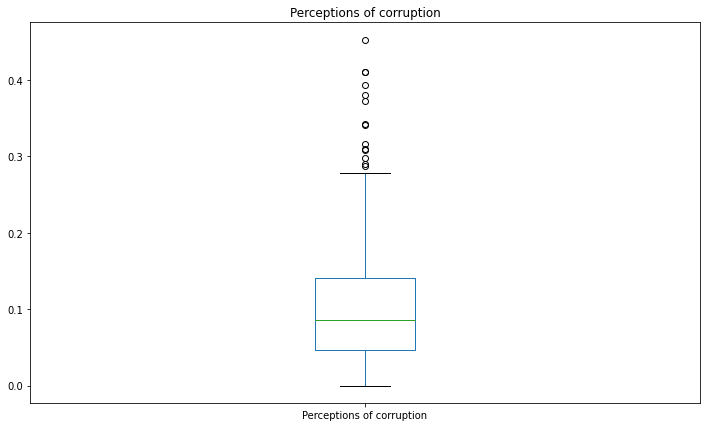

In [17]:
df19['Perceptions of corruption'].plot(kind='box',
                   title='Perceptions of corruption')

**6.Как же вообще распределен уровень счастья. Посмотрим на график, видим, что чаще всего граждане стран счастливы на 4.5 - 6
Причем "очень счастливых" стран все-таки больше, чем "очень несчастливых"**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


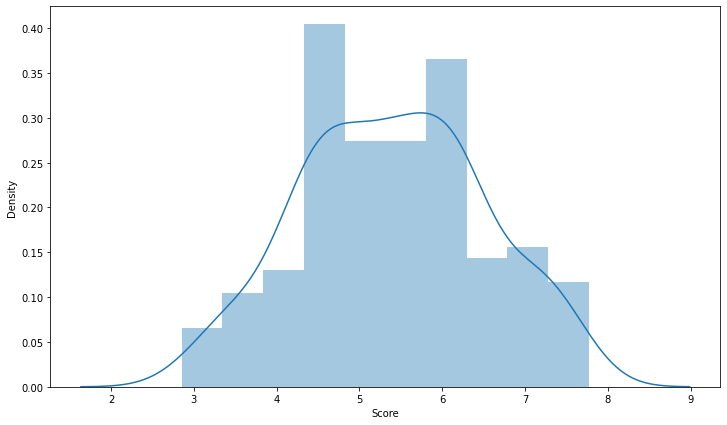

In [113]:
sns.distplot(df19.Score, bins=10)
